<a href="https://colab.research.google.com/github/dlwldbsd/train/blob/main/%ED%86%B5%ED%95%A9%EA%B3%BC%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy
!pip install mecab-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1231 sha256=a2dfcd422027409c2aaa3ea9a41300bb802f4ed341f42feab63c3db347d2337a
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python


In [ ]:
import csv
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
import pandas as pd

# Define the file path
path = '/content/drive/MyDrive/WILD_LIFE_07092023151558182.csv'

# Read the CSV file into a Pandas DataFrame
dataset = pd.read_csv(path)

dataset


,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,377.000,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,352.000,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,41.000,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,9.000,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,57.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,TOT_KNOWN,Total number of known species,LICHEN,Lichens,NZL,New Zealand,NBR,Number,0,Units,NaN,NaN,2026.000,NaN,NaN
3627,TOT_KNOWN_IND,Total number of indigenous known species,MOSS,Mosses,COL,Colombia,NBR,Number,0,Units,NaN,NaN,52.000,NaN,NaN
3628,THREAT_PERCENT,Threatened species as % of known species,MOSS,Mosses,NZL,New Zealand,PC,Percentage,0,Units,NaN,NaN,1.468,NaN,NaN
3629,THREAT_PERCENT,Threatened species as % of known species,LICHEN,Lichens,NZL,New Zealand,PC,Percentage,0,Units,NaN,NaN,0.790,NaN,NaN


In [ ]:
import pandas as pd
lucn = []
value = []
country = []
unit = []
for data in dataset["IUCN"]:
  lucn.append(data)
for data in dataset["Value"]:
  value.append(data)
for data in dataset["Country"]:
  country.append(data)
for data in dataset["Unit"]:
  unit.append(data)
df = pd.DataFrame({'lucn': lucn, 'value': value,'country':country,"unit":unit})
df

,lucn,value,country,unit
0,TOT_KNOWN,377.000,Australia,Number
1,TOT_KNOWN_IND,352.000,Australia,Number
2,ENDANGERED,41.000,Australia,Number
3,CRITICAL,9.000,Australia,Number
4,VULNERABLE,57.000,Australia,Number
...,...,...,...,...
3626,TOT_KNOWN,2026.000,New Zealand,Number
3627,TOT_KNOWN_IND,52.000,Colombia,Number
3628,THREAT_PERCENT,1.468,New Zealand,Percentage
3629,THREAT_PERCENT,0.790,New Zealand,Percentage


In [ ]:
# lucn = []
# value = []
# country = []

# # Iterate over rows of the DataFrame
# for index, row in df.iterrows():
#     if row["lucn"] == "VULNERABLE":
#         lucn.append(row["lucn"])
#         value.append(row["value"])
#         country.append(row["country"])

# # Print the lists
# print(lucn)
# print(value)
# print(country)



In [ ]:
number = []

# Iterate over the range of indices corresponding to the DataFrame rows
for i in range(3631):  # The range should go from 0 to 3630 (inclusive)
    if df["lucn"][i] == "ENDANGERED":
        number.append(i)

# number now contains the indices of rows where "lucn" is "ENDANGERED"
print(number)


[2, 8, 17, 26, 33, 39, 48, 56, 62, 71, 80, 93, 98, 104, 113, 121, 132, 141, 150, 159, 168, 177, 186, 194, 200, 209, 216, 225, 232, 241, 250, 259, 266, 272, 281, 290, 298, 307, 316, 324, 330, 334, 339, 345, 353, 359, 367, 378, 387, 396, 404, 413, 422, 431, 439, 444, 453, 460, 470, 479, 488, 497, 504, 511, 526, 532, 541, 550, 555, 559, 564, 570, 578, 584, 592, 605, 614, 628, 642, 653, 657, 674, 681, 687, 696, 703, 710, 716, 729, 735, 742, 751, 758, 762, 767, 773, 781, 787, 795, 820, 827, 836, 843, 851, 857, 863, 870, 878, 885, 891, 900, 909, 916, 922, 931, 939, 944, 953, 959, 968, 976, 981, 987, 996, 1005, 1013, 1024, 1033, 1043, 1049, 1058, 1064, 1072, 1078, 1086, 1093, 1107, 1114, 1115, 1116, 1136, 1137, 1177, 1178, 1179, 1228, 1229, 1230, 1287, 1288, 1361, 1387, 1401, 1432, 1433, 1434, 1529, 1540, 1551, 1552, 1569, 1570, 1596, 1627, 1628, 1629, 1686, 1687, 1724, 1725, 1726, 1727, 1769, 1793, 1815, 1842, 1897, 1918, 1919, 1960, 2007, 2008, 2009, 2056, 2057, 2079, 2080, 2081, 2100, 2101

In [ ]:
Lucn = []
Country = []
Value = []
for num in number:
  Lucn.append(df["lucn"][num])
  Country.append(df["country"][num])
  Value.append(df["value"][num])
Country

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Italy',
 'Japan',
 'Korea',
 'Mexico',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'United Kingdom',
 'Chile',
 'Estonia',
 'Slovenia',
 'Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Republic',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'United Kingdom',
 'Chile',
 'Estonia',
 'Slovenia',
 'Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Czech Republic',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'Poland',
 'Portugal',
 'Spain',
 'Switzerland',
 'Unite

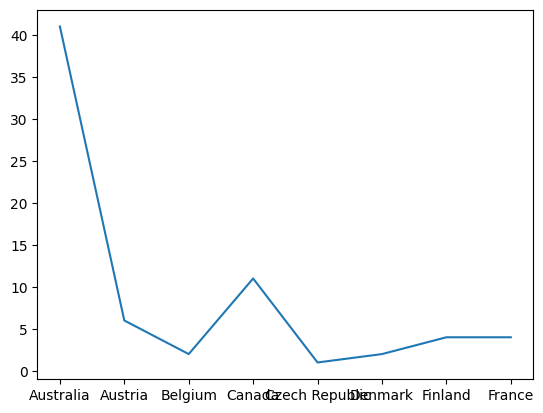

In [ ]:
plt.plot(Country[:8],Value[:8])
plt.show()

In [ ]:
df = pd.DataFrame({'LUCN': LUCN, 'value': VALUE,'country':CON})

In [ ]:
df

,LUCN,value,country


In [ ]:
LUC = []
VALU = []
CO = []
number = []

# Iterate over rows of the DataFrame
for index, row in df.iterrows():
    if row["LUCN"] == "THREATED_IND":
        number.append(index)  # Append the index of the row

# Now, we have the indices of rows where the "unit" is "Number"
# We can use these indices to extract data from other columns
for n in number:
    LUC.append(df.loc[n, "LUCN"])
    VALU.append(df.loc[n, "value"])
    CO.append(df.loc[n, "country"])


# CON now contains values from the "country" column where "unit" is "Number"


In [ ]:
df = pd.DataFrame({'LUCN': LUCN, 'value': VALUE,'country':CON})

In [ ]:
df

,LUCN,value,country
0,TOT_KNOWN,377.0,Australia
1,TOT_KNOWN_IND,352.0,Australia
2,ENDANGERED,41.0,Australia
3,CRITICAL,9.0,Australia
4,VULNERABLE,57.0,Australia
...,...,...,...
3024,THREATENED_IND,154.0,Sweden
3025,THREATENED_IND,1079.0,Sweden
3026,TOT_KNOWN,1362.0,New Zealand
3027,TOT_KNOWN,2026.0,New Zealand
